#Введение

Количество объектов: 4601  
Объектов, помеченных как "спам": 1813  
Часть обектов, помеченных как "спам" относительно всех объектов: 0,4

Свойства объектов:  
- 48 действительных свойств типа word_freq_WORD из промежутка [0, 100], обозначающих процент слов, совпадающих со словом WORD
- 6 действительных свойств типа  char_freq_CHAR] из промежутка [0, 100], обозначающих процент символов в письме, совпадающих с символом CHAR
- 1 действительное свойство, не меньшее единицы, типа capital_run_length_average, обозначающее среднюю длину всех непрерывных последовательностей заглавных букв в письме
- 1 действительное свойство, не меньшее единицы, типа capital_run_length_longest, обозначающее длину самой длинной непрерывной последовательности заглавных букв в письме
- 1 действительное свойство, не меньшее единицы типа capital_run_length_total, обозначающее сумму длин всех непрерывных последовательностей заглавных букв или общее число всех заглавных букв в письме
- 1 свойство со значениями из множества {0,1} типа spam, обозначающее, было ли письмо обозначено как "spam" (1) или нет (0).

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

feature_names = [
    line.strip().split(':')[0] 
    for line in open('spambase.names', 'r').readlines()[33:]
    ] + ['spam']
data = pd.read_csv('spambase.data', names=feature_names, header=None)

# Дерево решений

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X, y = data.iloc[:, :-1], data.iloc[:, -1]
barrier = 3000
X_train, X_test = X[:barrier], X[barrier + 1:]
y_train, y_test = y[:barrier], y[barrier + 1:]
tree = DecisionTreeClassifier(max_depth = 7, criterion = 'gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

def print_scoring(y_test, y_pred):
    print 'Accuracy:' + str(metrics.accuracy_score(y_test, y_pred))
    print 'Precision:' + str(metrics.precision_score(y_test, y_pred))
    print 'Recall:' + str(metrics.recall_score(y_test, y_pred))
    print 'F1:' + str(metrics.f1_score(y_test, y_pred))
    
print_scoring(y_test, y_pred)

Accuracy:0.76875
Precision:0.0
Recall:0.0
F1:0.0


#Дерево решений с перемешиванием

Accuracy:0.911381407472
Precision:0.912408759124
Recall:0.850340136054
F1:0.880281690141


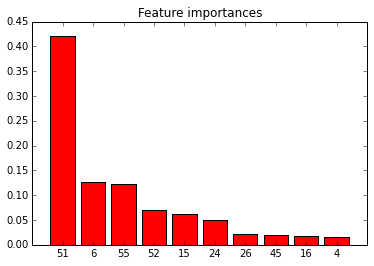

51: char_freq_!
6: word_freq_remove
55: capital_run_length_longest
52: char_freq_$
15: word_freq_free
24: word_freq_hp
26: word_freq_george
45: word_freq_edu
16: word_freq_business
4: word_freq_our


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

X, y = data.iloc[:, :-1], data.iloc[:, -1]
barrier = 3000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
tree = DecisionTreeClassifier(max_depth = 7, criterion = 'gini').fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print_scoring(y_test, y_pred_tree)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
%matplotlib inline
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], color="r", align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()
for i in indices[:10]: print "%i: %s" % (i, feature_names[i])

#Константная модель

In [4]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='constant', constant=0)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print 'DummyClassifier constant = 0'
print_scoring(y_test, y_pred_dummy)
print
dummy = DummyClassifier(strategy='constant', constant=1)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print 'DummyClassifier constant = 1'
print_scoring(y_test, y_pred_dummy)

DummyClassifier constant = 0
Accuracy:0.616854908775
Precision:0.0
Recall:0.0
F1:0.0

DummyClassifier constant = 1
Accuracy:0.383145091225
Precision:0.383145091225
Recall:1.0
F1:0.554020100503


#KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_scoring(y_test, y_pred_knn)

Accuracy:0.793223284101
Precision:0.762273901809
Recall:0.668934240363
F1:0.712560386473


#<font color='red'>Вывод по введению</font>

* Недостаток обучения моделей по входным данным без их предварительного "перемешивания" заключается в сильной зависимости между порядком следования данных и качеством классификатора.
* Признаки, указанные выше (под графиком "Feature Importances") оказались наиболее важными для определения спама.
* Лучшее качество дает константная модель, всегда возвращающая 0, потому что "полезных" писем в обучающей выборке больше.

#KNN с нормализацией

In [6]:
from sklearn.preprocessing import MinMaxScaler
X_train_n = MinMaxScaler().fit_transform(X_train)
X_test_n = MinMaxScaler().fit_transform(X_test)
knn_n = KNeighborsClassifier(n_neighbors=10).fit(X_train_n, y_train)
y_pred_knn_norm = knn_n.predict(X_test_n)
print_scoring(y_test, y_pred_knn_norm)

Accuracy:0.874891398784
Precision:0.868486352357
Recall:0.793650793651
F1:0.829383886256


#Дерево решений с нормализацией

In [7]:
tree_norm = DecisionTreeClassifier(max_depth = 7, criterion = 'gini').fit(X_train_n, y_train)
y_pred = tree_norm.predict(X_test_n)
print_scoring(y_test, y_pred)

Accuracy:0.894874022589
Precision:0.877358490566
Recall:0.843537414966
F1:0.860115606936


#<font color='red'>Вывод по нормализации</font>

* Нормализация влияет положительно на KNN-классификатор из-за того, что при нормализации вклад всех атрибутов в меру разности двух объектов уравнивается. Не влияет же она на качество классификатора на деревьях решений потому что в этом классификаторе идет сравнение признаков отдельно друг от друга.

#ROC-кривые

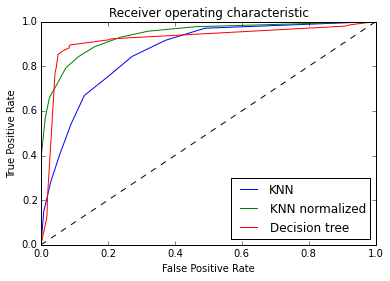

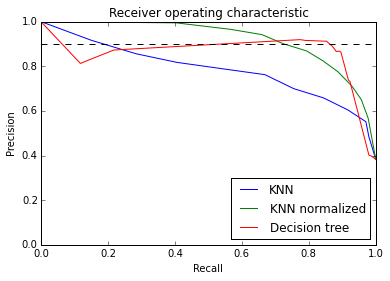

In [8]:
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_knn_n = knn_n.predict_proba(X_test_n)[:, 1]
y_score_tree = tree.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, threshhold = metrics.roc_curve(y_test.tolist(), y_score_knn)
fpr_knn_n, tpr_knn_n, threshhold = metrics.roc_curve(y_test.tolist(), y_score_knn_n)
fpr_tree, tpr_tree, threshhold = metrics.roc_curve(y_test.tolist(), y_score_tree)

precision_knn, recall_knn, threshhold = metrics.precision_recall_curve(y_test.tolist(), y_score_knn)
precision_knn_n, recall_knn_n, threshhold = metrics.precision_recall_curve(y_test.tolist(), y_score_knn_n)
precision_tree, recall_tree, threshhold = metrics.precision_recall_curve(y_test.tolist(), y_score_tree)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_knn_n, tpr_knn_n, label='KNN normalized')
plt.plot(fpr_tree, tpr_tree, label='Decision tree')
plt.plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(recall_knn, precision_knn, label='KNN')
plt.plot(recall_knn_n, precision_knn_n, label='KNN normalized')
plt.plot(recall_tree, precision_tree, label='Decision tree')
plt.plot()
plt.plot([0, 1], [0.9, 0.9], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=feature_names)
criteria = [line.split('"')[1].split("\\")[0] for line in open('tree.dot').readlines() if line.find("label")!=-1 and line.find("<=")!=-1]
print "There is a whole bunch (%i) of predicates, so here's first five:" % len(criteria)
print
for line in criteria[:5]: print line

There is a whole bunch (57) of predicates, so here's first five:

char_freq_! <= 0.0785
word_freq_remove <= 0.0450
char_freq_$ <= 0.1660
word_freq_free <= 0.1050
word_freq_money <= 0.0200


#<font color='red'>Вывод по порогам классификации</font>

* Классификатор, который (почти) всегда неверно метит объекты имеет AUC-ROC, близкий к нулю
* При классификации объектов с использованием деревьев решений сравниваются свойства объекта с некоторыми пороговыми значениями в определенном порядке. Сами условия сравнения выше.
* Из графика Precision-Recall выше видно, что при условии точности классификатора 90%, полнота определения спама не может быть больше ~85% для классификатора на основе деревьев решений и ~80% для классификатора на основе алгоритма KNN, работающего на нормированной выборке.

#Кросс-валидация

In [10]:
metrics_range = ["euclidean", "manhattan", "chebyshev", "minkowski"]
k_values = range(1,20)
weights_scheme = ['uniform', 'distance']
scoring_criterion = 'roc_auc'
param_dist_knn = dict(n_neighbors=k_values, weights=weights_scheme, metric=metrics_range)

In [11]:
from sklearn.grid_search import RandomizedSearchCV
rand_knn = RandomizedSearchCV(knn_n, param_dist_knn, cv=10, scoring=scoring_criterion, n_iter=10, random_state=4, n_jobs=-1).fit(X_train_n, y_train)

In [12]:
criterions = ['gini', 'entropy']
max_depth_range = range(8, 12)
min_samples_leaf_range = range(11,14)
max_features_range = range(20,25)
param_dist_tree = dict(criterion=criterions, max_depth=max_depth_range, min_samples_leaf=min_samples_leaf_range, max_features=max_features_range)

In [13]:
from sklearn.grid_search import GridSearchCV
grid_tree = GridSearchCV(tree, param_dist_tree, cv=10, scoring=scoring_criterion, n_jobs=-1).fit(X_train, y_train)

In [14]:
bp_knn = rand_knn.best_params_
bp_tree = grid_tree.best_params_

In [15]:
best_tree = best_tree = DecisionTreeClassifier(criterion=bp_tree['criterion'], max_depth=bp_tree['max_depth'], max_features=bp_tree['max_features'], min_samples_leaf=bp_tree['min_samples_leaf']).fit(X_train, y_train)
y_score_best_tree = best_tree.predict_proba(X_test)[:, 1]
best_knn = KNeighborsClassifier(metric=bp_knn['metric'], n_neighbors=bp_knn['n_neighbors'], weights=bp_knn['weights']).fit(X_train_n, y_train)
y_score_best_knn_n = best_knn.predict_proba(X_test_n)[:, 1]

print "Tree results:"
print "ROC-AUC score: %f" % metrics.roc_auc_score(y_test, y_score_knn_n)
print
print "KNN results:"
print "ROC-AUC score: %f" % metrics.roc_auc_score(y_test, y_score_tree)
print
print "Best decision tree results:"
print "ROC-AUC score: %f" % metrics.roc_auc_score(y_test, y_score_best_tree)
print
print "Best KNN results:"
print "ROC-AUC score: %f" % metrics.roc_auc_score(y_test, y_score_best_knn_n)

Tree results:
ROC-AUC score: 0.938867

KNN results:
ROC-AUC score: 0.917860

Best decision tree results:
ROC-AUC score: 0.959305

Best KNN results:
ROC-AUC score: 0.943183
